In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/car_evaluation.csv')
df

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
import torch
import torch.nn as nn
import numpy as np # 벡터 및 행렬 연산에서 매우 편리한 기능을 제공하는 라이브러리
import pandas as pd # 데이터 처리를 위해 사용
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv('./data/car_evaluation.csv')
dataset.head(10)

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [5]:
# matplotlib.rcParams
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

<AxesSubplot: ylabel='output'>

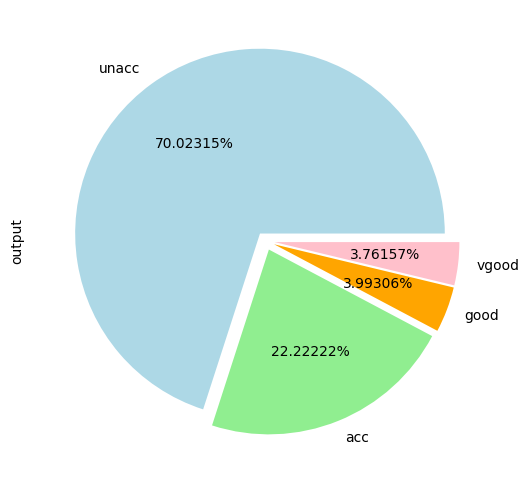

In [6]:
# 데이터를 분포 형태로 시각화
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(
                                   kind="pie",
                                   autopct="%0.05f%%",
                                   colors=["lightblue", "lightgreen", "orange", "pink"],
                                   explode=(0.05, 0.05, 0.05, 0.05)
                                  )

In [7]:
# 70% 자동차는 허용 불가능한 상태
# 22%는 허용 가능
# 즉, 양호한 자동차의 비율이 낮음

In [8]:
# 데이터를 범주형 타입으로 변환
categorical_columns = ["price", "maint", "doors", "persons", "lug_capacity", "safety"] # 컬럼 목록

for category in categorical_columns:
    dataset[category] = dataset[category].astype("category") # astype()을 사용해서 데이터를 범주형으로 변환
    
price = dataset["price"].cat.codes.values # cat.codes는 범주형 데이터를 숫자(넘파이 배열)로 변환할 때 사용
maint = dataset["maint"].cat.codes.values
doors = dataset["doors"].cat.codes.values
persons = dataset["persons"].cat.codes.values
lug_capacity = dataset["lug_capacity"].cat.codes.values
safety = dataset["safety"].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety],1) # np.stack(): 2개 이상의 넘파이 배열 합칠 때 사용
categorical_data[:10] # 합친 넘파이 배열 중, 10개의 행 출력

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [9]:
price # 범주형 데이터가 숫자로 변환되었음

array([3, 3, 3, ..., 1, 1, 1], dtype=int8)

In [10]:
# np.stack(), np.concatenate()의 차이점
a = np.array([[1,2],[3,4]]) # a.shape: 2x2
b = np.array([[5,6],[7,8]]) # b.shape 2x2
c = np.array([[5,6],[7,8],[9,10]]) # c.shape: 3x2

# 같은 차원의 배열을 합치기
print( np.concatenate((a,b), axis=0) ) # shape: 4x2
print('---------------------------------')
print( np.stack((a,b), axis=0) ) # shape: 2x2x2

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
---------------------------------
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [11]:
# 다른 차원의 배열을 합쳐보기
print( np.concatenate((a,c), axis=0) ) # shape: (5,2)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [12]:
print( np.stack((a,c), axis=0) ) # Error // ValueError: all input arrays must have the same shape

ValueError: all input arrays must have the same shape

In [13]:
# torch모듈을 이용해서 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [14]:
# 레이블로 사용할 컬럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output)
print(outputs, end='\n\n\n')
outputs = outputs.values
print(outputs, end='\n\n\n')
outputs = torch.tensor(outputs).flatten() # 1차원 텐서로 변환
print(outputs, end='\n\n\n')

print(categorical_data.shape)
print(outputs.shape)

      acc  good  unacc  vgood
0       0     0      1      0
1       0     0      1      0
2       0     0      1      0
3       0     0      1      0
4       0     0      1      0
...   ...   ...    ...    ...
1723    0     1      0      0
1724    0     0      0      1
1725    0     0      1      0
1726    0     1      0      0
1727    0     0      0      1

[1728 rows x 4 columns]


[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


tensor([0, 0, 1,  ..., 0, 0, 1], dtype=torch.uint8)


torch.Size([1728, 6])
torch.Size([6912])


In [15]:
# 가변수 예제
import pandas as pd
import numpy as np

data = {
    'gender' : ['male', 'female', 'male'],
    'weight' : [72, 55, 68],
    'nation' : ['Japan', 'Korea', 'Australia']
}
print(type(data))

df = pd.DataFrame(data)
df

<class 'dict'>


,gender,weight,nation
0,male,72,Japan
1,female,55,Korea
2,male,68,Australia


In [16]:
pd.get_dummies(df)

,weight,gender_female,gender_male,nation_Australia,nation_Japan,nation_Korea
0,72,0,1,0,1,0
1,55,1,0,0,0,1
2,68,0,1,1,0,0


In [17]:
# ravel(), reshape(), flatten()
a = np.array([[1,2], [3,4]])

print(a.ravel())
print(a.reshape(-1))
print(a.flatten())

[1 2 3 4]
[1 2 3 4]
[1 2 3 4]


In [18]:
dataset["price"].cat

In [19]:
dir(dataset["price"].cat)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_hidden_attrs',
 '_index',
 '_name',
 '_parent',
 '_reset_cache',
 '_validate',
 'add_categories',
 'as_ordered',
 'as_unordered',
 'categories',
 'codes',
 'ordered',
 'remove_categories',
 'remove_unused_categories',
 'rename_categories',
 'reorder_categories',
 'set_categories']

In [20]:
# cat.codes
dataset["price"].cat.codes

0       3
1       3
2       3
3       3
4       3
       ..
1723    1
1724    1
1725    1
1726    1
1727    1
Length: 1728, dtype: int8

In [21]:
dataset["price"].cat.categories

Index(['high', 'low', 'med', 'vhigh'], dtype='object')

In [22]:
# 범주형 컬럼을, N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [( col_size, min(50, (col_size+1)//2) ) for col_size in categorical_column_sizes]

print(categorical_column_sizes)
print(categorical_embedding_sizes)

[4, 4, 4, 3, 3, 3]
[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [23]:
# train / test 데이터셋 분리
total_records = 1728 # len(dataset)
test_records = int(total_records * .2) # 20%를 테스트 데이터로 사용

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [24]:
len(outputs)

6912

In [25]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [26]:
type(categorical_train_data)

torch.Tensor

In [27]:
categorical_train_data.shape

torch.Size([1383, 6])

In [28]:
categorical_train_data[:, :] # 모든 행, 모든 열

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        ...,
        [1, 3, 3, 0, 1, 1],
        [1, 3, 3, 0, 1, 2],
        [1, 3, 3, 0, 1, 0]])

In [29]:
categorical_train_data[:, 1] # 모든 행의 1열

tensor([3, 3, 3,  ..., 3, 3, 3])

In [30]:
categorical_train_data[1, :] # 1행의 모든 열

tensor([3, 3, 0, 0, 2, 2])

In [31]:
# 모델의 네트워크 생성
class Model(nn.Module): # 클래스 형태로 구현되는 모델은, nn.Module을 상속받음
    '''
    __init__()은 모델에서 사용될 파라미터, 신경망 초기화하기위한 용도
    객체가 생성될 때, 자동으로 호출됨
    
    1. self: 자기 자신
    2. embedding_size: 범주형 컬럼의 임배딩 크기
    3. layers: 모든 계층에 대한 목록
    4. p: 드랍아웃 (defalut=0.5)
    '''
    def __init__(self,embedding_size, output_size, layers, p=0.4):
        super().__init__() # 부모 클래스(nn.Module)에 접근할 때 사용 // super는 self를 사용하지 않음
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        
        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols # 입력층의 크기를 찾기 위해 범주형 컬럼 개수를 input_size에 저장
        
        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i
            
        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers) # 신경망의 모든 계층이 순차적으로 실행되도록, 모든 계층(all_layers)에 대한 목록을 nn.Sequential 클래스로 전달
    
    '''
    학습데이터를 입력 받아 연산을 진행
    모델 객체를 데이터와 같이 호출하면 자동으로 실행됨
    '''
    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1) # 넘파이의 concatenate와 같지만, 대상만 Tensor임
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

In [32]:
# Model 클래스의 객체 생성
# 하이퍼 파라미터 정의
output_size = 4
layers = [200, 100, 50]
dropout = 0.4

model = Model(categorical_embedding_sizes, output_size, layers, dropout)
model

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(4, 2)
    (2): Embedding(4, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)

In [33]:
# 모델 학습 전, 손실함수와 옵티마이저를 정의해야함
# 1. 손실함수 : 데이터 분류이므로 cross-entropy 사용
# 2. 옵티마이저 : Adam
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [34]:
loss_function

CrossEntropyLoss()

In [35]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [36]:
# GPU / CPU 사용 지정
if torch.cuda.is_available():
    device = torch.device("cuda") # GPU사용
else:
    device = torch.device("cpu") # CPU사용

In [37]:
device

device(type='cpu')

In [38]:
# 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)

for i in range(epochs): # 각 반복마다 손실함수가 오차를 계산
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss) # 반복할 때마다 오차를 aggregated_losses에 추가
    
    if i%25 == 1:
        print(f"epoch: {i:3} loss: {single_loss.item():10.8f}")
    
    optimizer.zero_grad()
    single_loss.backward() # 가중치를 업데이트하기 위해 손실 함수의 backward() 호출
    optimizer.step() # step()을 이용해 기울기 업데이트
    
print(f"epoch: {i:3} loss: {single_loss.item():10.10f}")

epoch:   1 loss: 1.59727037
epoch:  26 loss: 1.36166334
epoch:  51 loss: 1.27543592
epoch:  76 loss: 1.16567016
epoch: 101 loss: 1.04774058
epoch: 126 loss: 0.92499435
epoch: 151 loss: 0.85963440
epoch: 176 loss: 0.77317607
epoch: 201 loss: 0.68829238
epoch: 226 loss: 0.65328062
epoch: 251 loss: 0.64848030
epoch: 276 loss: 0.62325448
epoch: 301 loss: 0.61003989
epoch: 326 loss: 0.60012084
epoch: 351 loss: 0.59415251
epoch: 376 loss: 0.58202553
epoch: 401 loss: 0.58123624
epoch: 426 loss: 0.58084005
epoch: 451 loss: 0.57863694
epoch: 476 loss: 0.56531572
epoch: 500 loss: 0.5721113086


In [39]:
# 테스트 데이터셋으로 모델 예측
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss: 8f}')

Loss:  0.553920


In [40]:
print(y_val[:5])

tensor([[ 2.9738,  1.5811, -3.1256, -2.9810],
        [ 2.1029,  1.3375, -2.3909, -2.1950],
        [ 2.5875,  1.5180, -3.5086, -3.6149],
        [ 3.1307,  1.6736, -3.0706, -3.2218],
        [ 1.1683,  0.7456, -2.0261, -1.8446]])


In [41]:
print(y_val)

tensor([[ 2.9738,  1.5811, -3.1256, -2.9810],
        [ 2.1029,  1.3375, -2.3909, -2.1950],
        [ 2.5875,  1.5180, -3.5086, -3.6149],
        ...,
        [ 2.8471,  1.4640, -3.5073, -3.1742],
        [ 3.3158,  1.6892, -3.1413, -3.2945],
        [ 4.0864,  2.8656, -7.4251, -7.7065]])


In [42]:
y_val.shape

torch.Size([345, 4])

In [43]:
# 가장 큰 값을 가지는 인덱스 확인
y_val = np.argmax(y_val, axis=1)
y_val[:5]

tensor([0, 0, 0, 0, 0])

In [45]:
# 테스트 데이터셋을 이용한 정확도 확인
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[256   3]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       259
           1       0.25      0.01      0.02        86

    accuracy                           0.74       345
   macro avg       0.50      0.50      0.44       345
weighted avg       0.63      0.74      0.65       345

0.744927536231884
